<a href="https://colab.research.google.com/github/Binaaa04/dataMining/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB

=== Sampling Menggunakan Rumus Slovin ===
Jumlah sampel dengan margin of error 5%: 1248

Validasi nilai negatif pada Sales, Customers, SchoolHoliday dan Store:
Kolom 'Sales' valid, tidak ada nilai negatif.

Kolom 'Customers' valid, tidak ada nilai negatif.

Kolom 'SchoolHoliday' valid, tidak ada nilai negatif.

Kolom 'Store' valid, tidak a

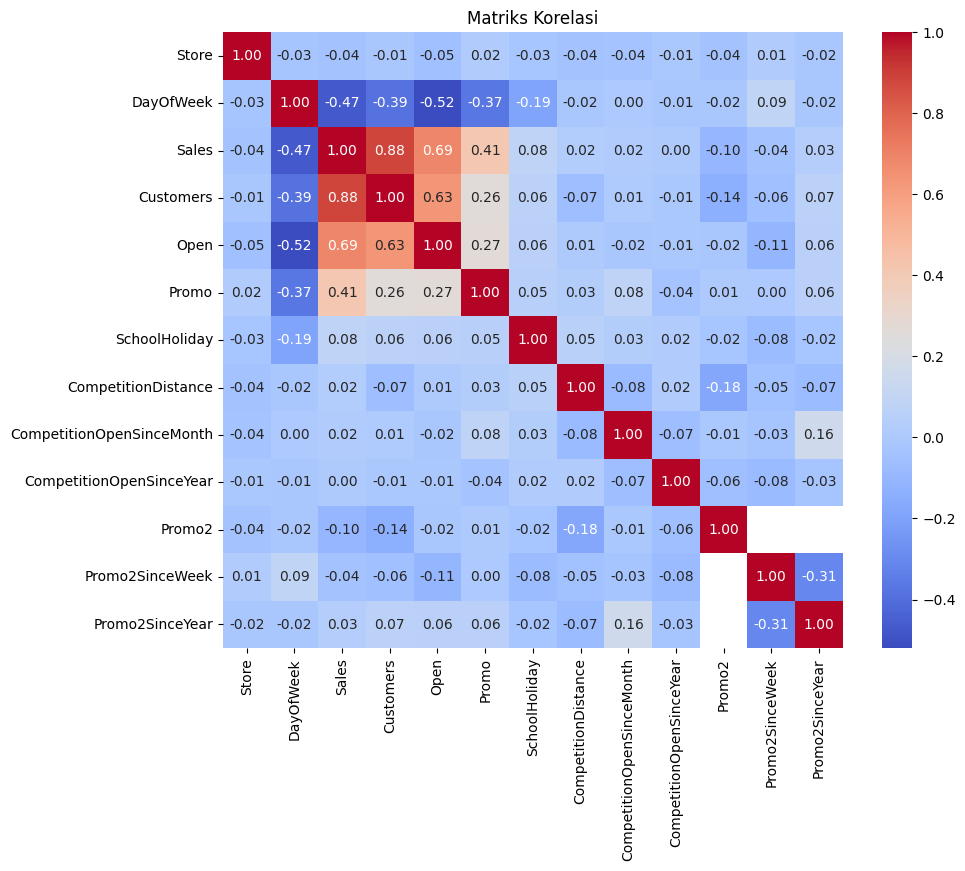

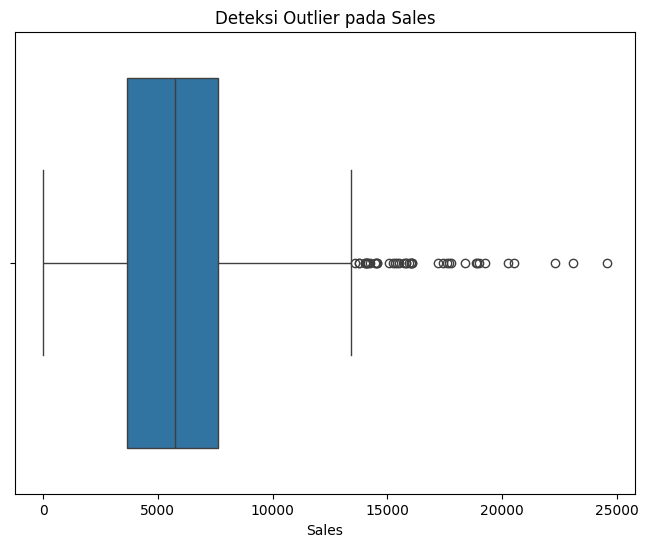

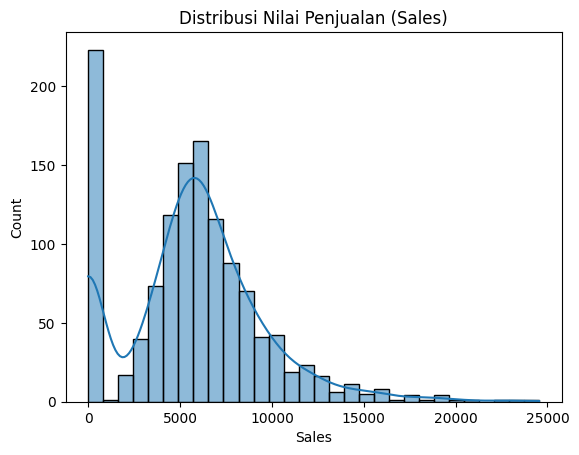

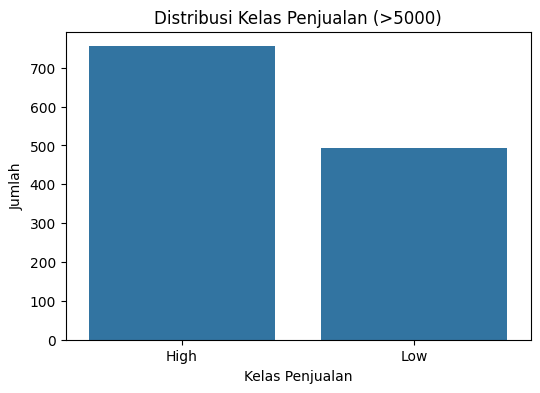

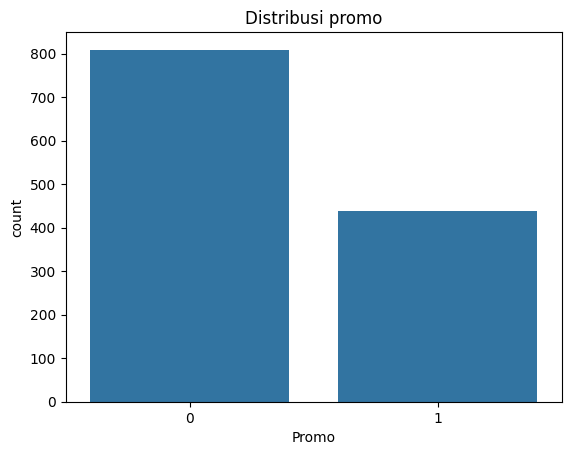

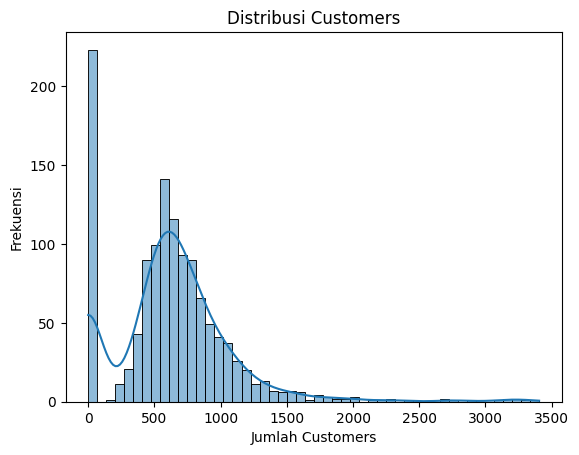

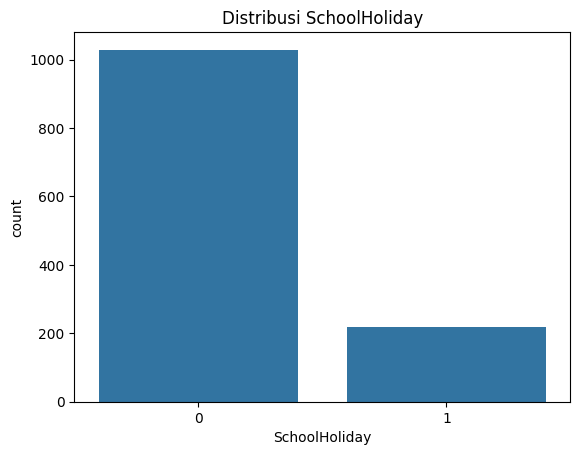

In [ ]:
#EDA/ Eksplorasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
train = pd.read_csv('/content/drive/MyDrive/Data Mining/train_rs.csv', low_memory=False)
store = pd.read_csv('/content/drive/MyDrive/Data Mining/store.csv')

# menggabungkan data train dan store
data = pd.merge(train, store, on='Store')

# Lihat data awal
data.info()
data.isnull().sum()
data.describe()

# 3. Sampling Slovin
print("\n=== Sampling Menggunakan Rumus Slovin ===")
N = len(data)  # total populasi
e = 0.02       # margin of error (5%)
n = int(N / (1 + N * e**2))  # rumus Slovin
print(f"Jumlah sampel dengan margin of error 2%: {n}")
data = data.sample(n=n, random_state=42)

#Memvalidasi kolom sales, customer, competion distance
print("\nValidasi nilai negatif pada Sales, Customers, SchoolHoliday dan Store:")
for col in ['Sales', 'Customers', 'SchoolHoliday', 'Store']:
    if data[col].min() < 0:
        print(f"Terdapat nilai negatif pada kolom '{col}', perlu diperiksa.")
    else:
        print(f"Kolom '{col}' valid, tidak ada nilai negatif.")
    print("")

#Mengecek data terduplikat
duplicate_rows = data.duplicated().sum()
print("Data duplikat :")
if duplicate_rows > 0:
    print(f"\nTerdapat {duplicate_rows} baris data duplikat.")
else:
    print("\nTidak ada baris yang terduplikat.")
    print("")

df = pd.DataFrame(data)
numerik_data = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerik_data.corr()
print("Korelasi : ")
print(correlation_matrix['Sales'])

#visualisasi hasil korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

#Mengecek outlier menggunakan boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Sales'].dropna())
plt.title(f"Deteksi Outlier pada {'Sales'}")
plt.show()

#Visualisasi nilai sales (regresi)
df = pd.DataFrame(data)
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribusi Nilai Penjualan (Sales)')

# Tambahkan kolom kelas penjualan
data['Sales_Class'] = data['Sales'].apply(lambda x: 'High' if x > 5000 else 'Low')

# Visualisasi (klasifikasi)
plt.figure(figsize=(6,4))
sns.countplot(x='Sales_Class', data=data)
plt.title('Distribusi Kelas Penjualan (>5000)')
plt.xlabel('Kelas Penjualan')
plt.ylabel('Jumlah')
plt.show()

#visualisasi (clustering)
sns.countplot(x='Promo', data=df)
plt.title('Distribusi promo')
plt.show()

sns.histplot(df['Customers'], bins=50, kde=True)
plt.title('Distribusi Customers')
plt.xlabel('Jumlah Customers')
plt.ylabel('Frekuensi')
plt.show()


sns.countplot(x='SchoolHoliday', data=df)
plt.title('Distribusi SchoolHoliday')
plt.show()

In [ ]:
#PREPOCESSING DATA
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
train = pd.read_csv('/content/drive/MyDrive/Data Mining/train_rs.csv', low_memory=False)
store = pd.read_csv('/content/drive/MyDrive/Data Mining/store.csv')
test=pd.read_csv('/content/drive/MyDrive/Data Mining/test_rs.csv')

# menggabungkan data train dan store
data = pd.merge(train, store, on='Store')

# Sampling Slovin
print("\n=== Sampling Menggunakan Rumus Slovin ===")
N = len(data)  # total populasi
e = 0.02       # margin of error (5%)
n = int(N / (1 + N * e**2))  # rumus Slovin
print(f"Jumlah sampel dengan margin of error 2%: {n}")
data = data.sample(n=n, random_state=42)
df = pd.DataFrame(data)

# Mengisi nilai kosong
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(df['Promo2SinceWeek'].median())

# Ubah kolom tanggal ke datetime
df['Date'] = pd.to_datetime(df['Date'])

# Buat fitur baru dari kolom Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)  # Sabtu/Minggu = 1

# Drop kolom Date asli
df.drop(['Date'], axis=1, inplace=True)

#Kolom Label untuk tingkatan penjualan
df['Sales_Class'] = df['Sales'].apply(lambda x: 'High' if x > 5000 else 'Low')

# Kolom label untuk Promo Aktif dan Jumlah Customer
df['Promo_Customers'] = df.apply(lambda x: x['Customers'] if x['Promo'] == 1 else 0, axis=1)

# Tampilkan jumlah missing value setelah dibersihkan
print("\nDeskripsi statistik setelah pembersihan:")
print(df.isnull().sum())

# 3. Binning
# Binning dilakukan pada fitur 'Sales' untuk mengelompokkan data menjadi beberapa kategori.
df['Sales_binned'] = pd.cut(df['Sales'], bins=2, labels=['Low', 'High'])
print("\nData setelah binning:")
print(df.head())

# Membagi data menjadi data training dan testing
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data training dan testing
print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)


=== Sampling Menggunakan Rumus Slovin ===
Jumlah sampel dengan margin of error 5%: 2493

Deskripsi statistik setelah pembersihan:
Store                           0
DayOfWeek                       0
Sales                           0
Customers                       0
Open                            0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
StoreType                       0
Assortment                      0
CompetitionDistance             4
CompetitionOpenSinceMonth     794
CompetitionOpenSinceYear      794
Promo2                          0
Promo2SinceWeek                 0
Promo2SinceYear              1256
PromoInterval                1256
Year                            0
Month                           0
Day                             0
WeekOfYear                      0
IsWeekend                       0
Sales_Class                     0
Promo_Customers                 0
dtype: int64

Data setelah binning:
        Store  Da


=== Sampling Menggunakan Rumus Slovin ===
Jumlah sampel dengan margin of error 2%: 2493

[Linear Regression]
MSE: 2327455.4430992366
R-squared: 0.8508672575414696


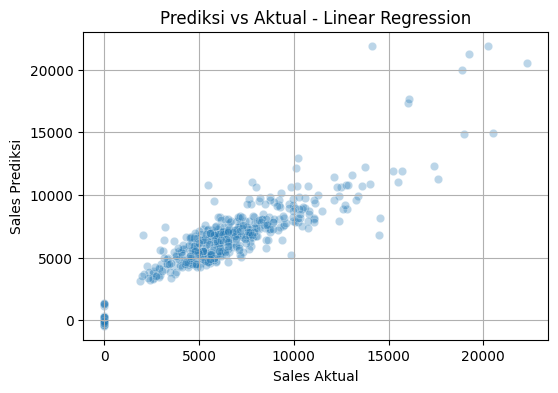


[Random Forest]
Accuracy: 0.7735470941883767
F1-score: 0.7577279716729356


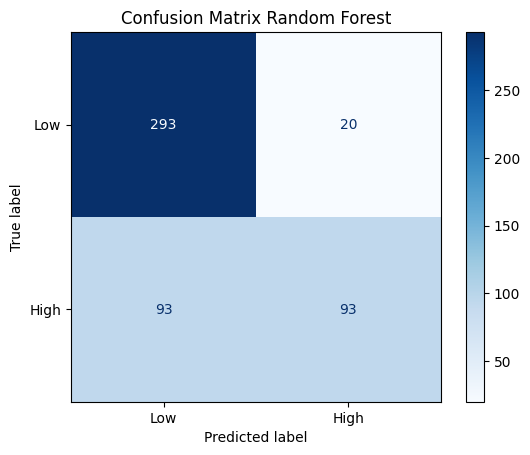


[SVM]
Accuracy: 0.749498997995992
F1-score: 0.706960404039614


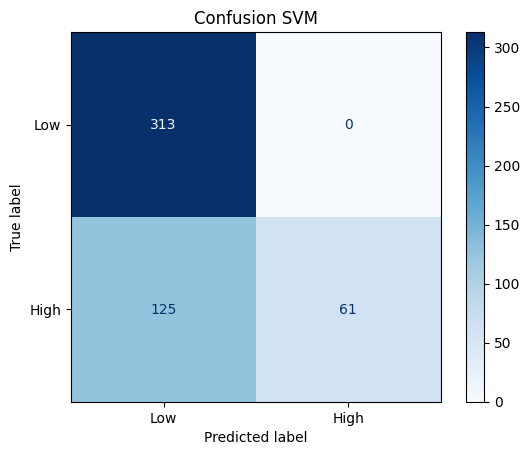


[Decision Tree]
Accuracy: 0.7735470941883767
F1-score: 0.7570686553874041


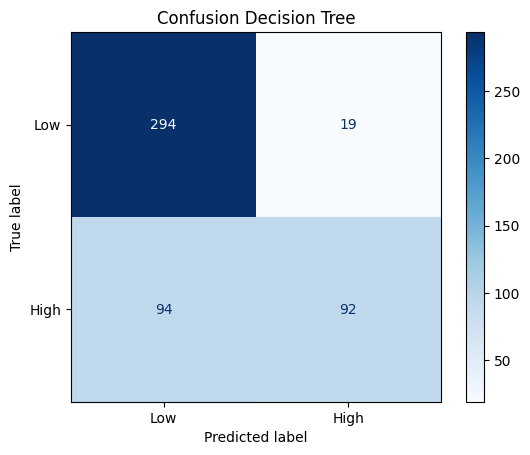

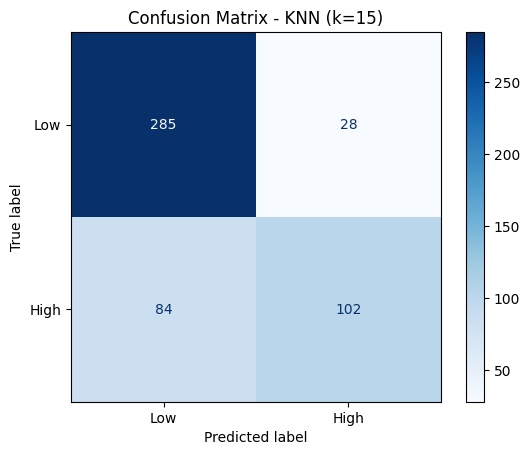

Accuracy: 0.7755511022044088
F1-score: 0.7648781359444826

==== Perbandingan Model Klasifikasi ====
Model           Accuracy   F1-score
Random Forest   0.7735     0.7577
SVM             0.7495     0.7070
Decision Tree   0.7735     0.7571
KNN (k=15)      0.7756     0.7649


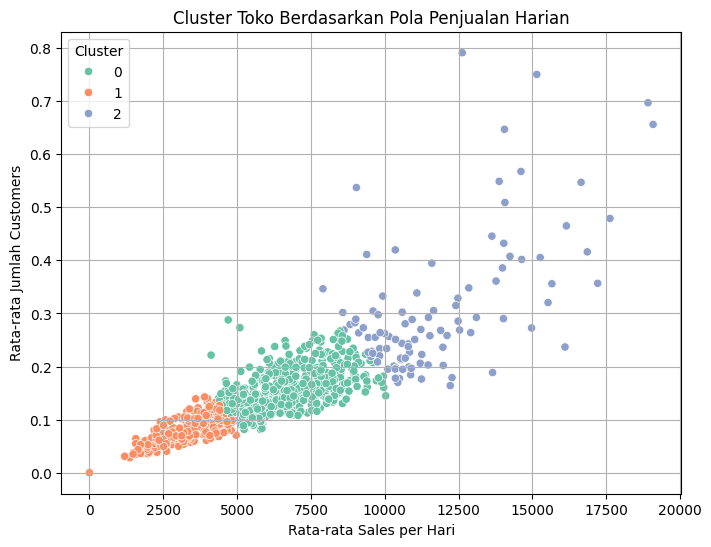


=== [SILHOUETTE SCORE CLUSTERING] ===
Silhouette Score: 0.4753


In [ ]:
# === IMPORT LIBRARY ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score

# === LOAD DATA ===
train = pd.read_csv('/content/drive/MyDrive/Data Mining/train_rs.csv', low_memory=False)
store = pd.read_csv('/content/drive/MyDrive/Data Mining/store.csv')
test=pd.read_csv('/content/drive/MyDrive/Data Mining/test_rs.csv')

# === MERGE DATA ===
data = pd.merge(train, store, on='Store')

# Sampling Slovin
print("\n=== Sampling Menggunakan Rumus Slovin ===")
N = len(data)  # total populasi
e = 0.02       # margin of error (5%)
n = int(N / (1 + N * e**2))  # rumus Slovin
print(f"Jumlah sampel dengan margin of error 2%: {n}")
data = data.sample(n=n, random_state=42)
df = pd.DataFrame(data)

# === HANDLE MISSING VALUES ===
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(df['Promo2SinceWeek'].median())

# === KONVERSI TANGGAL & FITUR BARU ===
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)
df.drop(['Date'], axis=1, inplace=True)

# === FITUR TAMBAHAN ===
df['Sales_Class'] = df['Sales'].apply(lambda x: 'High' if x > 5000 else 'Low')
df['Promo_Customers'] = df.apply(lambda x: x['Customers'] if x['Promo'] == 1 else 0, axis=1)

# === DROP KOLOM TIDAK DIPAKAI ===
drop_cols = ['StateHoliday', 'PromoInterval', 'StoreType', 'Assortment', 'Sales_binned']  # Sesuaikan
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

# === ENCODING KATEGORIK ===
le = LabelEncoder()
df['Sales_Class'] = le.fit_transform(df['Sales_Class'])  # Untuk klasifikasi label

# === SCALING NUMERIK ===
scaler = MinMaxScaler()
num_cols = ['Customers', 'Promo_Customers']
df[num_cols] = scaler.fit_transform(df[num_cols])

# ============= 1. REGRESI ===================
# Pilih fitur untuk regresi
X_reg = df[['Open', 'Promo', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Customers']]
y_reg = df['Sales']

# Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Model Linear Regression
model_lin = LinearRegression()
model_lin.fit(X_train_reg, y_train_reg)
y_pred_lin = model_lin.predict(X_test_reg)

# Evaluasi linear regresi
mse = mean_squared_error(y_test_reg, y_pred_lin)
r2 = r2_score(y_test_reg, y_pred_lin)
print("\n[Linear Regression]")
print("MSE:", mse)
print("R-squared:", r2)

#visualisasi linear regresi
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_reg, y=y_pred_lin, alpha=0.3)
plt.xlabel("Sales Aktual")
plt.ylabel("Sales Prediksi")
plt.title("Prediksi vs Aktual - Linear Regression")
plt.grid(True)
plt.show()

# ============= KLASIFIKASI ===================
X_clf = df[['Open', 'SchoolHoliday', 'IsWeekend', 'WeekOfYear']]
y_clf = df['Sales_Class']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_clf, y_train_clf)
y_pred_rf = rf.predict(X_test_clf)
acc_rf = accuracy_score(y_test_clf, y_pred_rf)
f1_rf = classification_report(y_test_clf, y_pred_rf, output_dict=True)['weighted avg']['f1-score']

print("\n[Random Forest]")
print("Accuracy:", acc_rf)
print("F1-score:", f1_rf)

# Confusion Matrix RF
cm_rf = confusion_matrix(y_test_clf, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Low', 'High'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Random Forest")
plt.show()

# SVM
svm = SVC()
svm.fit(X_train_clf, y_train_clf)
y_pred_svm = svm.predict(X_test_clf)
acc_svm = accuracy_score(y_test_clf, y_pred_svm)
f1_svm = classification_report(y_test_clf, y_pred_svm, output_dict=True)['weighted avg']['f1-score']
print("\n[SVM]")
print("Accuracy:", acc_svm)
print("F1-score:", f1_svm)

cm_svm = confusion_matrix(y_test_clf, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Low', 'High'])
disp.plot(cmap='Blues')
plt.title("Confusion SVM")
plt.show()

# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_clf, y_train_clf)
y_pred_dt = dtree.predict(X_test_clf)
acc_dt = accuracy_score(y_test_clf, y_pred_dt)
f1_dt = classification_report(y_test_clf, y_pred_dt, output_dict=True)['weighted avg']['f1-score']
print("\n[Decision Tree]")
print("Accuracy:", acc_dt)
print("F1-score:", f1_dt)

cm_dt = confusion_matrix(y_test_clf, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Low', 'High'])
disp.plot(cmap='Blues')
plt.title("Confusion Decision Tree")
plt.show()

# KNN
acc_knn_list = []
for k in range(3, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_clf, y_train_clf)
    y_pred_knn = knn.predict(X_test_clf)
    acc = accuracy_score(y_test_clf, y_pred_knn)
    f1 = classification_report(y_test_clf, y_pred_knn, output_dict=True)['weighted avg']['f1-score']
    acc_knn_list.append((k, acc, f1))

# Ambil k terbaik berdasarkan akurasi
best_k, best_acc_knn, best_f1_knn = sorted(acc_knn_list, key=lambda x: x[1], reverse=True)[0]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_clf, y_train_clf)
y_pred_best_knn = best_knn.predict(X_test_clf)
cm_knn = confusion_matrix(y_test_clf, y_pred_best_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Low', 'High'])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - KNN (k={best_k})")
plt.show()

print("Accuracy:", best_acc_knn)
print("F1-score:", best_f1_knn)

# Rangkuman Tabel
print("\n==== Perbandingan Model Klasifikasi ====")
print(f"{'Model':<15} {'Accuracy':<10} {'F1-score'}")
print(f"{'Random Forest':<15} {acc_rf:.4f}     {f1_rf:.4f}")
print(f"{'SVM':<15} {acc_svm:.4f}     {f1_svm:.4f}")
print(f"{'Decision Tree':<15} {acc_dt:.4f}     {f1_dt:.4f}")
print(f"{'KNN (k=' + str(best_k) + ')':<15} {best_acc_knn:.4f}     {best_f1_knn:.4f}")

# ============ 3. CLUSTERING =================
#Agregasi per toko
store_daily = df.groupby('Store').agg({
    'Sales': 'mean',
    'Customers': 'mean'
}).reset_index()

# Scaling
scaler = MinMaxScaler()
cluster_scaled = scaler.fit_transform(store_daily[['Sales', 'Customers']])

# Clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(cluster_scaled)
store_daily['Cluster'] = clusters

# Visualisasi
plt.figure(figsize=(8, 6))
sns.scatterplot(data=store_daily, x='Sales', y='Customers', hue='Cluster', palette='Set2')
plt.title("Cluster Toko Berdasarkan Pola Penjualan Harian")
plt.xlabel("Rata-rata Sales per Hari")
plt.ylabel("Rata-rata Jumlah Customers")
plt.grid(True)
plt.show()

# Silhouette Score
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(cluster_scaled, clusters)
print("\n=== [SILHOUETTE SCORE CLUSTERING] ===")
print(f"Silhouette Score: {sil_score:.4f}")
